### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Load data

In [2]:
loan_df = pd.read_csv("loan/loan.csv")

C:\Users\sajana\AppData\Local\Temp\ipykernel_22156\2270713266.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv("loan/loan.csv")


In [12]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Get data dictionary

In [6]:
data_dict = pd.read_excel("Data_Dictionary.xlsx")

In [7]:
data_dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [8]:
data_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  115 non-null    object
 1   Description  116 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


### Data Cleaning and Preprocessing

In [14]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [15]:
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [16]:
loan_df.shape

(39717, 111)

- We can see that some columns have only null values, so it can be dropped because it wont make any meaningful inference.

In [19]:
def get_columns_with_all_null(columns, df):
    max_limit = 39717
    col_list = []
    
    for i in columns:
        if(df[i].isnull().sum() == max_limit):
            col_list.append(i)
        else:
            continue
            
    return col_list

In [213]:
### Get columns with all null values

In [214]:
null_cols = get_columns_with_all_null(loan_df.columns, loan_df)

In [215]:
### Displaying the columns with all null values

In [22]:
null_cols

['mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'tot_hi_cred_lim',
 'total_bal

In [24]:
len(null_cols)

54

In [25]:
### 54 columns have all null values, so dropping these columns as part of data cleaning

In [26]:
loan_df.drop(columns = null_cols,inplace=True)

In [27]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [28]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [32]:
### fill employee title with "na" for nan values

In [31]:
loan_df.emp_title = loan_df.emp_title.fillna("na")
loan_df.desc = loan_df.desc.fillna("na")

In [33]:
loan_df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [34]:
loan_df.emp_length = loan_df.emp_length.fillna("na")

In [45]:
### Check meaning of url

In [46]:
data_dict.head(2)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.


In [47]:
data_dict[data_dict['LoanStatNew'] == "url"]

,LoanStatNew,Description
111,url,URL for the LC page with listing data.


In [50]:
### Since url is the  "LC page with listing data", will not make any relevance for further analysis we can drop this column

In [49]:
loan_df.drop(columns=['url'],inplace=True)

In [51]:
### check description column meaning

In [52]:
data_dict[data_dict['LoanStatNew'] == "desc"]

,LoanStatNew,Description
15,desc,Loan description provided by the borrower


In [53]:
### Since description column simply describing the provided loan details, it can be dropped 

In [54]:
loan_df.drop(columns=['desc'],inplace=True)

In [55]:
loan_df['mths_since_last_delinq'].unique()

array([ nan,  35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,
        40.,  74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,
        24.,  16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,
        22.,  59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,
        70.,  29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,
         4.,  43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,
        72.,  42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,
        66.,  32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103.,
       120., 106.,  89., 107.,  85.,  97.,  95.,   0.])

In [56]:
### fill mths_since_last_delinq this column with 0 for null values

In [57]:
loan_df['mths_since_last_delinq'] = loan_df['mths_since_last_delinq'].fillna(0)

In [58]:
loan_df['mths_since_last_record'].unique()

array([ nan, 113., 105.,  97.,  33.,  93.,  52.,  85.,  90.,  91., 114.,
        92., 117.,  87.,  45.,  83., 118.,  38., 101., 100., 112., 110.,
        88.,  79.,  77., 107., 102.,  98.,  95., 103.,  96., 116., 111.,
        89., 108.,  29., 106., 115.,  53.,  86.,  57.,  63.,  94., 109.,
        99., 104.,  76.,  61.,  28.,  23.,  75.,  47.,  82.,  21.,  62.,
        44.,  80.,  67., 119.,  42.,  34.,  66.,  58.,  22.,  56.,  72.,
        64.,  50.,  69.,  49.,  74.,  35.,  12.,  26.,  78.,  54.,  37.,
        73.,  11.,  31.,  59.,  32.,  81.,  68.,  55.,  39.,  51.,  70.,
        30.,  41.,  71.,  40.,  43.,  27.,  65.,  46.,  19.,  17.,  25.,
        13.,  48.,  36.,   7.,  60.,  14.,   6.,  18.,   0.,  20., 120.,
       129.,   5.])

In [59]:
### fill mths_since_last_record null values with 0

In [60]:
loan_df['mths_since_last_record'] = loan_df['mths_since_last_record'].fillna(0)

In [61]:
loan_df['next_pymnt_d'].unique()

array([nan, 'Jun-16', 'Jul-16'], dtype=object)

In [62]:
### Since this next_pymnt_d have only one value for whole data it can be dropped

In [77]:
loan_df.drop(columns=['next_pymnt_d'],inplace=True)

In [64]:
loan_df['chargeoff_within_12_mths'].unique()

array([ 0., nan])

In [65]:
### Since this column chargeoff_within_12_mths have only one value it can be dropped

In [66]:
loan_df.drop(columns=['chargeoff_within_12_mths'],inplace=True)

In [67]:
loan_df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [68]:
### pub_rec_bankruptcies fill this null values with 0

In [69]:
loan_df['pub_rec_bankruptcies'] = loan_df['pub_rec_bankruptcies'].fillna(0)

In [70]:
loan_df['tax_liens'].unique()

array([ 0., nan])

In [71]:
### Since tax_liens this have only one value it can be dropped

In [72]:
loan_df.drop(columns=['tax_liens'],inplace=True)

In [73]:
### Let's check the Null values for all columns

In [74]:
loan_df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal 

In [78]:
loan_df['title'].unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

In [79]:
data_dict[data_dict['LoanStatNew'] == "title"]

,LoanStatNew,Description
95,title,The loan title provided by the borrower


In [80]:
loan_df['title'] = loan_df['title'].fillna("na")

In [81]:
loan_df['revol_util'].unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [82]:
data_dict[data_dict['LoanStatNew'] == "revol_util"]

,LoanStatNew,Description
91,revol_util,"Revolving line utilization rate, or the amount..."


In [83]:
loan_df['revol_util'] = loan_df['revol_util'].fillna("0.00%")

In [86]:
loan_df['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [87]:
### since collections_12_mths_ex_med this have only one value, it can be dropped

In [88]:
loan_df.drop(columns=['collections_12_mths_ex_med'],inplace=True)

### Exploratory Data Analysis

#### Univariate Analysis

In [89]:
loan_df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,na,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,0.0,0.0,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0


In [91]:
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

- 32950 customers were fully paid the loan
- 5627 loans are charged off.
- 1140 are ongoing loans.

In [90]:
len(list(loan_df['member_id'].unique()))

39717

- we have 39717 unique customers present.

In [92]:
loan_df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

- The average loan amount is 11219, and maximum loan amount is 35000

In [93]:
loan_df['funded_amnt'].describe()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

The average loan amount is 10947, and maximum loan amount is 35000

In [94]:
loan_df['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

- Most of the loan tenure is 36 months.

In [99]:
loan_df['int_rate'].value_counts().sort_values()

17.44%      1
22.64%      1
24.59%      1
24.40%      1
21.48%      1
14.67%      1
17.54%      1
16.71%      1
16.01%      1
17.46%      1
17.34%      1
16.20%      1
18.72%      1
18.36%      1
16.96%      1
16.15%      1
20.52%      1
14.70%      2
14.25%      2
14.88%      2
15.83%      2
14.07%      2
15.01%      2
17.15%      2
21.82%      2
17.03%      2
10.64%      2
14.62%      2
15.38%      2
20.20%      2
22.94%      2
16.33%      2
15.07%      2
17.90%      2
13.84%      2
19.16%      3
18.49%      3
13.12%      3
14.12%      3
12.62%      3
21.64%      3
20.86%      3
18.84%      3
13.93%      3
13.62%      3
24.11%      3
15.45%      3
14.75%      3
20.17%      3
16.08%      3
15.76%      3
20.40%      3
20.69%      3
15.13%      4
19.39%      4
23.59%      4
18.78%      4
15.25%      4
21.14%      4
18.53%      4
21.21%      4
15.88%      4
16.59%      5
12.67%      5
11.09%      5
14.38%      5
12.54%      5
14.30%      5
19.82%      5
18.21%      5
13.75%      5
12.12%

- Most of the loan have interest rate of 10.99%.
- Some exceptional high interest rate of 24.59% also applied for few customers.

In [101]:
loan_df['installment'].value_counts().sort_values()

32.72       1
374.59      1
289.34      1
1231.45     1
1229.81     1
383.03      1
477.98      1
36.53       1
210.91      1
244.10      1
1112.90     1
253.84      1
600.17      1
497.43      1
199.02      1
379.90      1
453.65      1
60.42       1
331.92      1
361.74      1
211.28      1
64.48       1
41.90       1
412.48      1
735.26      1
150.98      1
53.93       1
248.24      1
279.43      1
337.84      1
362.97      1
622.71      1
490.88      1
639.26      1
227.11      1
118.91      1
376.19      1
535.83      1
89.03       1
970.69      1
176.13      1
389.51      1
398.03      1
237.26      1
574.55      1
447.96      1
516.29      1
474.61      1
373.05      1
246.42      1
429.38      1
671.86      1
1094.23     1
338.89      1
268.41      1
334.52      1
668.67      1
156.44      1
332.71      1
311.00      1
94.43       1
48.04       1
330.65      1
167.53      1
764.83      1
903.35      1
440.08      1
131.07      1
347.53      1
386.81      1
48.72       1
581.32

- Most of the customers opted for 311 installments for the loan.

In [103]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [104]:
loan_df['grade'].value_counts().sort_values()

G      316
F     1049
E     2842
D     5307
C     8098
A    10085
B    12020
Name: grade, dtype: int64

In [105]:
loan_df['sub_grade'].value_counts().sort_values()

G5      30
G3      48
G4      56
G2      78
G1     104
F5     118
F4     168
F3     185
F2     249
F1     329
E5     416
E4     454
E3     553
E2     656
E1     763
D5     874
D1     931
D4     981
A1    1139
D3    1173
C5    1186
C4    1236
D2    1348
A2    1508
C3    1529
A3    1810
B1    1830
C2    2011
B2    2057
C1    2136
B4    2512
B5    2704
A5    2742
A4    2886
B3    2917
Name: sub_grade, dtype: int64

In [109]:
loan_df['emp_title'].value_counts().nlargest(10)

na                   2459
US Army               134
Bank of America       109
IBM                    66
AT&T                   59
Kaiser Permanente      56
USAF                   54
Wells Fargo            54
UPS                    53
US Air Force           52
Name: emp_title, dtype: int64

In [110]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [111]:
loan_df['emp_length'].value_counts().nlargest(10)

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
Name: emp_length, dtype: int64

In [112]:
loan_df['home_ownership'].value_counts().nlargest(10)

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [113]:
loan_df['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [114]:
loan_df['verification_status'].value_counts().nlargest(10)

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [115]:
loan_df['pymnt_plan'].value_counts().nlargest(10)

n    39717
Name: pymnt_plan, dtype: int64

In [116]:
loan_df['purpose'].value_counts().nlargest(10)

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
Name: purpose, dtype: int64

In [117]:
loan_df['title'].value_counts().nlargest(10)

Debt Consolidation           2184
Debt Consolidation Loan      1729
Personal Loan                 659
Consolidation                 517
debt consolidation            505
Home Improvement              356
Credit Card Consolidation     356
Debt consolidation            334
Small Business Loan           328
Credit Card Loan              317
Name: title, dtype: int64

In [119]:
### Here title and purpose columns contains similar data, so only one column required.

In [118]:
loan_df['dti'].value_counts().nlargest(10)

0.00     183
12.00     51
18.00     45
19.20     40
13.20     39
12.48     38
16.80     38
13.50     38
6.00      37
15.00     36
Name: dti, dtype: int64

In [121]:
data_dict.head(1)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...


In [122]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [129]:
### Get the meaning of below features from data dictionary

In [125]:
data_dict[data_dict['LoanStatNew'] == "delinq_2yrs"]['Description']

13    The number of 30+ days past-due incidences of ...
Name: Description, dtype: object

In [126]:
data_dict[data_dict['LoanStatNew'] == "earliest_cr_line"]['Description']

18    The month the borrower's earliest reported cre...
Name: Description, dtype: object

In [127]:
data_dict[data_dict['LoanStatNew'] == "inq_last_6mths"]['Description']

32    The number of inquiries in past 6 months (excl...
Name: Description, dtype: object

In [128]:
data_dict[data_dict['LoanStatNew'] == "mths_since_last_delinq"]['Description']

50    The number of months since the borrower's last...
Name: Description, dtype: object

In [ ]:
data_dict[data_dict['LoanStatNew'] == "mths_since_last_delinq"]['Description']

In [130]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [131]:
loan_df['total_pymnt'].describe()

count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64

In [132]:

loan_df['total_rec_prncp'].describe()

count    39717.000000
mean      9793.348813
std       7065.522127
min          0.000000
25%       4600.000000
50%       8000.000000
75%      13653.260000
max      35000.020000
Name: total_rec_prncp, dtype: float64

In [133]:
loan_df['total_rec_late_fee'].describe()

count    39717.000000
mean         1.363015
std          7.289979
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64

In [135]:
loan_df['recoveries'].value_counts().nlargest(10)

0.00      35499
11.29         4
10.40         4
10.66         3
44.92         3
10.07         3
16.27         3
13.00         3
164.81        3
16.50         3
Name: recoveries, dtype: int64

In [136]:

loan_df['policy_code'].value_counts().nlargest(10)

1    39717
Name: policy_code, dtype: int64

In [137]:
### Since policy code have only one value for the whole data, this feature is not a relevant one

In [138]:

loan_df['application_type'].value_counts().nlargest(10)

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [139]:
### Since application_type have only one value for the whole data, this feature is not a relevant one

In [140]:

loan_df['acc_now_delinq'].value_counts().nlargest(10)

0    39717
Name: acc_now_delinq, dtype: int64

In [141]:
### Since acc_now_delinq have only one value for the whole data, this feature is not a relevant one

In [142]:

loan_df['pub_rec_bankruptcies'].value_counts().nlargest(10)

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [143]:

loan_df['last_pymnt_d'].value_counts().nlargest(10)

May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
Apr-13     851
Mar-12     844
Aug-12     832
Jan-14     832
Aug-14     832
Name: last_pymnt_d, dtype: int64

In [144]:


loan_df['total_rec_int'].describe()

count    39717.000000
mean      2263.663172
std       2608.111964
min          0.000000
25%        662.180000
50%       1348.910000
75%       2833.400000
max      23563.680000
Name: total_rec_int, dtype: float64

In [145]:

loan_df['total_rec_prncp'].describe()

count    39717.000000
mean      9793.348813
std       7065.522127
min          0.000000
25%       4600.000000
50%       8000.000000
75%      13653.260000
max      35000.020000
Name: total_rec_prncp, dtype: float64

### Bi-variate Analysis

In [147]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [148]:
loan_df.groupby(['loan_status'])['loan_amnt'].mean()

loan_status
Charged Off    12104.385108
Current        17053.991228
Fully Paid     10866.455994
Name: loan_amnt, dtype: float64

In [149]:
loan_df.groupby(['loan_status'])['funded_amnt'].mean()

loan_status
Charged Off    11753.398792
Current        16485.701754
Fully Paid     10618.520486
Name: funded_amnt, dtype: float64

In [154]:
loan_df.groupby(['loan_status','term'])['term'].count()

loan_status  term      
Charged Off   36 months     3227
              60 months     2400
Current       60 months     1140
Fully Paid    36 months    25869
              60 months     7081
Name: term, dtype: int64

In [155]:

loan_df.groupby(['loan_status','int_rate'])['int_rate'].count()

loan_status  int_rate
Charged Off  10.00%       31
             10.01%        1
             10.08%        7
             10.14%        1
             10.20%        3
             10.25%       22
             10.28%        3
             10.33%        1
             10.36%       32
             10.37%       51
             10.38%       23
             10.39%        5
             10.46%        1
             10.51%        3
             10.59%       47
             10.62%       23
             10.65%       46
             10.71%        8
             10.74%       33
             10.75%       26
             10.78%        4
             10.83%        5
             10.91%        3
             10.95%        9
             10.96%        2
             10.99%       95
             11.03%       10
             11.09%        2
             11.11%       36
             11.12%       30
             11.14%       22
             11.22%        3
             11.26%       12
             11.28%  

In [156]:

loan_df.groupby(['loan_status'])['installment'].mean()

loan_status
Charged Off    336.175006
Current        395.476061
Fully Paid     320.125232
Name: installment, dtype: float64

- The number of installment is relatively high for loan defaulters than the fully paid.

In [157]:
loan_df.groupby(['loan_status','grade'])['grade'].count()

loan_status  grade
Charged Off  A          602
             B         1425
             C         1347
             D         1118
             E          715
             F          319
             G          101
Current      A           40
             B          345
             C          264
             D          222
             E          179
             F           73
             G           17
Fully Paid   A         9443
             B        10250
             C         6487
             D         3967
             E         1948
             F          657
             G          198
Name: grade, dtype: int64

In [169]:
loan_df.groupby(['sub_grade','loan_status'])['loan_status'].count()

sub_grade  loan_status
A1         Charged Off      30
           Fully Paid     1109
A2         Charged Off      74
           Fully Paid     1434
A3         Charged Off     103
           Fully Paid     1707
A4         Charged Off     178
           Current          13
           Fully Paid     2695
A5         Charged Off     217
           Current          27
           Fully Paid     2498
B1         Charged Off     171
           Current          33
           Fully Paid     1626
B2         Charged Off     228
           Current          56
           Fully Paid     1773
B3         Charged Off     341
           Current          92
           Fully Paid     2484
B4         Charged Off     329
           Current          75
           Fully Paid     2108
B5         Charged Off     356
           Current          89
           Fully Paid     2259
C1         Charged Off     336
           Current          81
           Fully Paid     1719
C2         Charged Off     321
           Curre

In [164]:

loan_df.groupby(['loan_status','emp_length'])['emp_length'].max()

loan_status  emp_length
Charged Off  1 year           1 year
             10+ years     10+ years
             2 years         2 years
             3 years         3 years
             4 years         4 years
             5 years         5 years
             6 years         6 years
             7 years         7 years
             8 years         8 years
             9 years         9 years
             < 1 year       < 1 year
             na                   na
Current      1 year           1 year
             10+ years     10+ years
             2 years         2 years
             3 years         3 years
             4 years         4 years
             5 years         5 years
             6 years         6 years
             7 years         7 years
             8 years         8 years
             9 years         9 years
             < 1 year       < 1 year
             na                   na
Fully Paid   1 year           1 year
             10+ years     10+ years
             2

In [165]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [166]:
loan_df.groupby(['loan_status','home_ownership'])['home_ownership'].count()

loan_status  home_ownership
Charged Off  MORTGAGE           2327
             OTHER                18
             OWN                 443
             RENT               2839
Current      MORTGAGE            638
             OWN                  83
             RENT                419
Fully Paid   MORTGAGE          14694
             NONE                  3
             OTHER                80
             OWN                2532
             RENT              15641
Name: home_ownership, dtype: int64

In [170]:
loan_df.groupby(['loan_status'])['annual_inc'].mean()

loan_status
Charged Off    62427.298034
Current        75430.665105
Fully Paid     69862.503328
Name: annual_inc, dtype: float64

- The annual income of customers who have fully paid the loan is higher than the defaulters.

In [173]:

loan_df.groupby(['loan_status','purpose'])['purpose'].count()

loan_status  purpose           
Charged Off  car                     160
             credit_card             542
             debt_consolidation     2767
             educational              56
             home_improvement        347
             house                    59
             major_purchase          222
             medical                 106
             moving                   92
             other                   633
             renewable_energy         19
             small_business          475
             vacation                 53
             wedding                  96
Current      car                      50
             credit_card             103
             debt_consolidation      586
             home_improvement        101
             house                    14
             major_purchase           37
             medical                  12
             moving                    7
             other                   128
             renewable_en

In [174]:

loan_df.groupby(['loan_status'])['dti'].mean()

loan_status
Charged Off    14.000624
Current        14.750009
Fully Paid     13.148421
Name: dti, dtype: float64

In [175]:

loan_df.groupby(['loan_status'])['delinq_2yrs'].mean()

loan_status
Charged Off    0.170606
Current        0.141228
Fully Paid     0.142580
Name: delinq_2yrs, dtype: float64

In [176]:

loan_df.groupby(['loan_status'])['mths_since_last_delinq'].mean()

loan_status
Charged Off    13.763817
Current        11.652632
Fully Paid     12.538300
Name: mths_since_last_delinq, dtype: float64

In [177]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [178]:
loan_df.groupby(['loan_status'])['mths_since_last_record'].mean()

loan_status
Charged Off    7.671050
Current        3.863158
Fully Paid     4.449469
Name: mths_since_last_record, dtype: float64

In [179]:
loan_df.groupby(['loan_status'])['open_acc'].mean()

loan_status
Charged Off    9.178070
Current        9.936842
Fully Paid     9.292049
Name: open_acc, dtype: float64

In [181]:
loan_df.groupby(['loan_status','pub_rec'])['pub_rec'].count()

loan_status  pub_rec
Charged Off  0           5160
             1            457
             2             10
Current      0           1094
             1             43
             2              3
Fully Paid   0          31347
             1           1556
             2             38
             3              7
             4              2
Name: pub_rec, dtype: int64

In [182]:

loan_df.groupby(['loan_status'])['revol_bal'].mean()

loan_status
Charged Off    13514.243647
Current        16530.893860
Fully Paid     13251.107739
Name: revol_bal, dtype: float64

In [183]:

loan_df.groupby(['loan_status'])['out_prncp'].mean()

loan_status
Charged Off       0.000000
Current        1784.752632
Fully Paid        0.000000
Name: out_prncp, dtype: float64

In [184]:

loan_df.groupby(['loan_status'])['total_pymnt'].mean()

loan_status
Charged Off     6838.030941
Current        21852.875561
Fully Paid     12725.781963
Name: total_pymnt, dtype: float64

In [185]:

loan_df.groupby(['loan_status'])['total_rec_prncp'].mean()

loan_status
Charged Off     3967.177947
Current        14700.949465
Fully Paid     10618.514176
Name: total_rec_prncp, dtype: float64

In [186]:

loan_df.groupby(['loan_status'])['total_rec_int'].mean()

loan_status
Charged Off    2194.459385
Current        7150.753254
Fully Paid     2106.398438
Name: total_rec_int, dtype: float64

In [187]:

loan_df.groupby(['loan_status'])['total_rec_late_fee'].mean()

loan_status
Charged Off    4.291692
Current        1.172878
Fully Paid     0.869452
Name: total_rec_late_fee, dtype: float64

In [188]:

loan_df.groupby(['loan_status'])['recoveries'].mean()

loan_status
Charged Off    672.101872
Current          0.000000
Fully Paid       0.000000
Name: recoveries, dtype: float64

In [189]:


loan_df.groupby(['loan_status'])['collection_recovery_fee'].mean()

loan_status
Charged Off    87.56594
Current         0.00000
Fully Paid      0.00000
Name: collection_recovery_fee, dtype: float64

In [190]:

loan_df.groupby(['loan_status'])['last_pymnt_amnt'].mean()

loan_status
Charged Off     326.020833
Current         397.468491
Fully Paid     3159.554033
Name: last_pymnt_amnt, dtype: float64

In [191]:

loan_df.groupby(['loan_status'])['acc_now_delinq'].mean()

loan_status
Charged Off    0.0
Current        0.0
Fully Paid     0.0
Name: acc_now_delinq, dtype: float64

In [192]:


loan_df.groupby(['loan_status','pub_rec_bankruptcies'])['pub_rec_bankruptcies'].count()

loan_status  pub_rec_bankruptcies
Charged Off  0.0                      5259
             1.0                       366
             2.0                         2
Current      0.0                      1101
             1.0                        37
             2.0                         2
Fully Paid   0.0                     31676
             1.0                      1271
             2.0                         3
Name: pub_rec_bankruptcies, dtype: int64

### Plots

Text(0, 0.5, 'count')

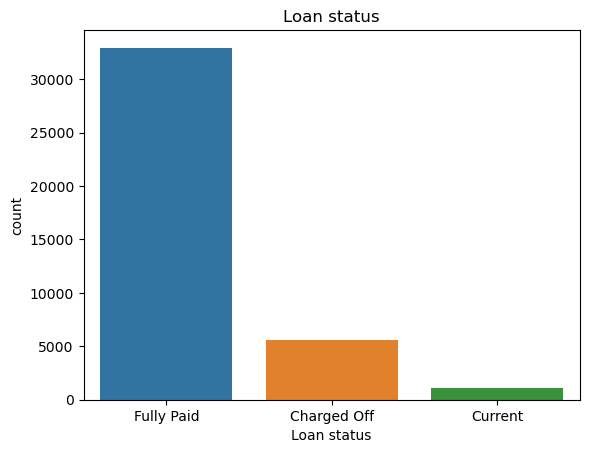

In [216]:
sns.countplot(x=loan_df['loan_status'])
plt.title("Loan status")
plt.xlabel("Loan status")
plt.ylabel("count")

C:\Users\sajana\AppData\Local\Temp\ipykernel_22156\2679388690.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df['loan_amnt'], kde=False, bins=40)


Text(0.5, 1.0, 'Loan Amount distribution plot')

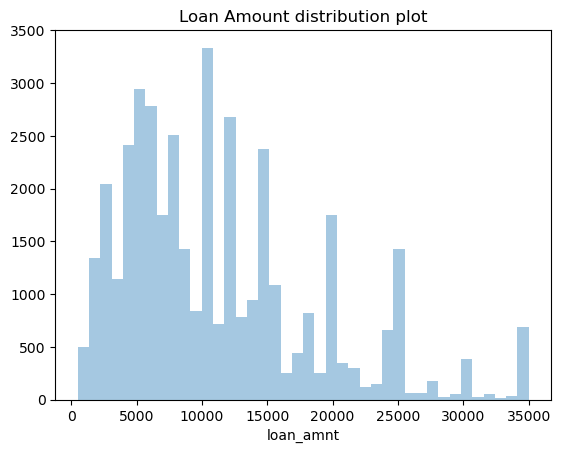

In [197]:
sns.distplot(loan_df['loan_amnt'], kde=False, bins=40)
plt.title('Loan Amount distribution plot')

<Axes: title={'center': 'Loan amount'}, xlabel='loan_status', ylabel='loan_amnt'>

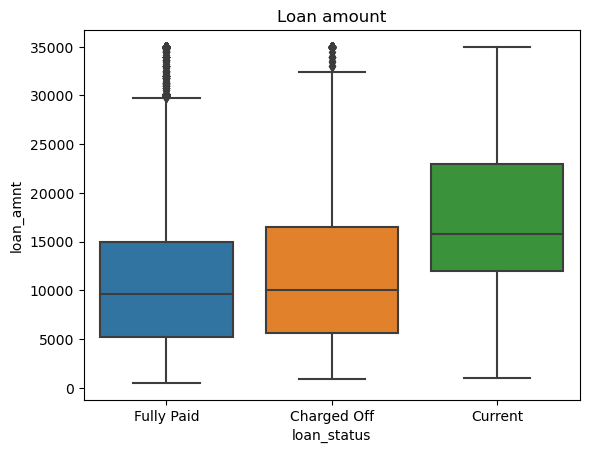

In [217]:
plt.title("Loan amount")
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_df)

Text(0, 0.5, 'count')

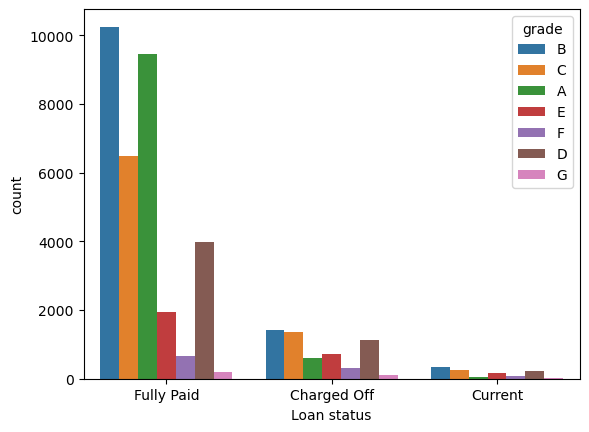

In [200]:
sns.countplot(x='loan_status',hue="grade", data=loan_df)
plt.xlabel("Loan status")
plt.ylabel("count")

Text(0, 0.5, 'count')

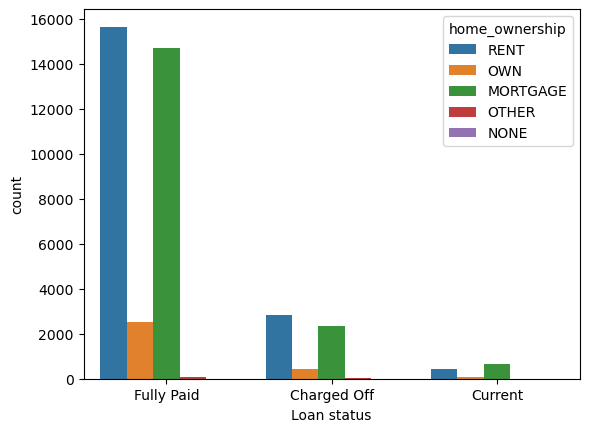

In [201]:
sns.countplot(x='loan_status',hue="home_ownership", data=loan_df)
plt.xlabel("Loan status")
plt.ylabel("count")

Text(0, 0.5, 'count')

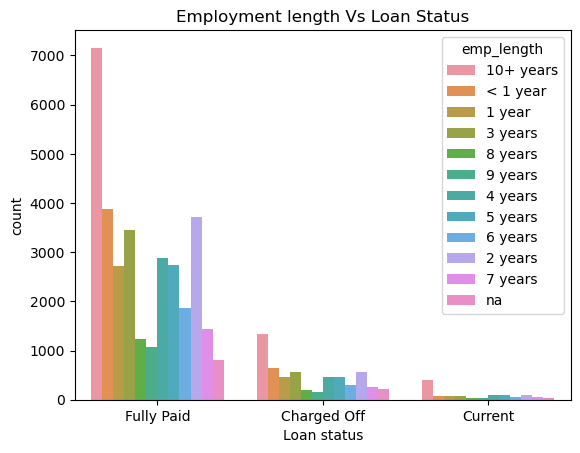

In [212]:
sns.countplot(x='loan_status',hue="emp_length", data=loan_df)
plt.title("Employment length Vs Loan Status")
plt.xlabel("Loan status")
plt.ylabel("count")

C:\Users\sajana\AppData\Local\Temp\ipykernel_22156\1453976241.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df["installment"], kde=False)


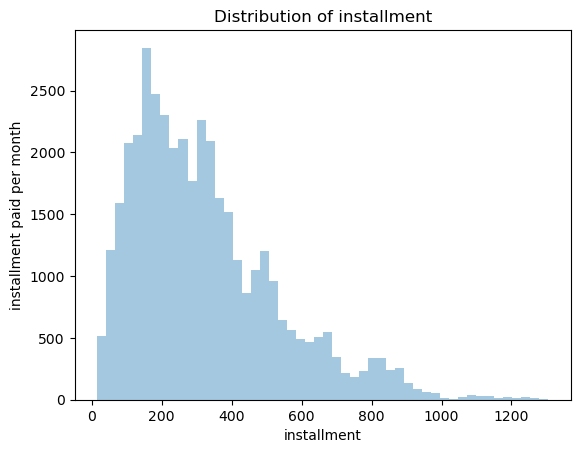

In [211]:
sns.distplot(loan_df["installment"], kde=False)
plt.title("Distribution of installment")
plt.ylabel("installment paid per month")
plt.show()

### Heatmap for finding correlation among various features

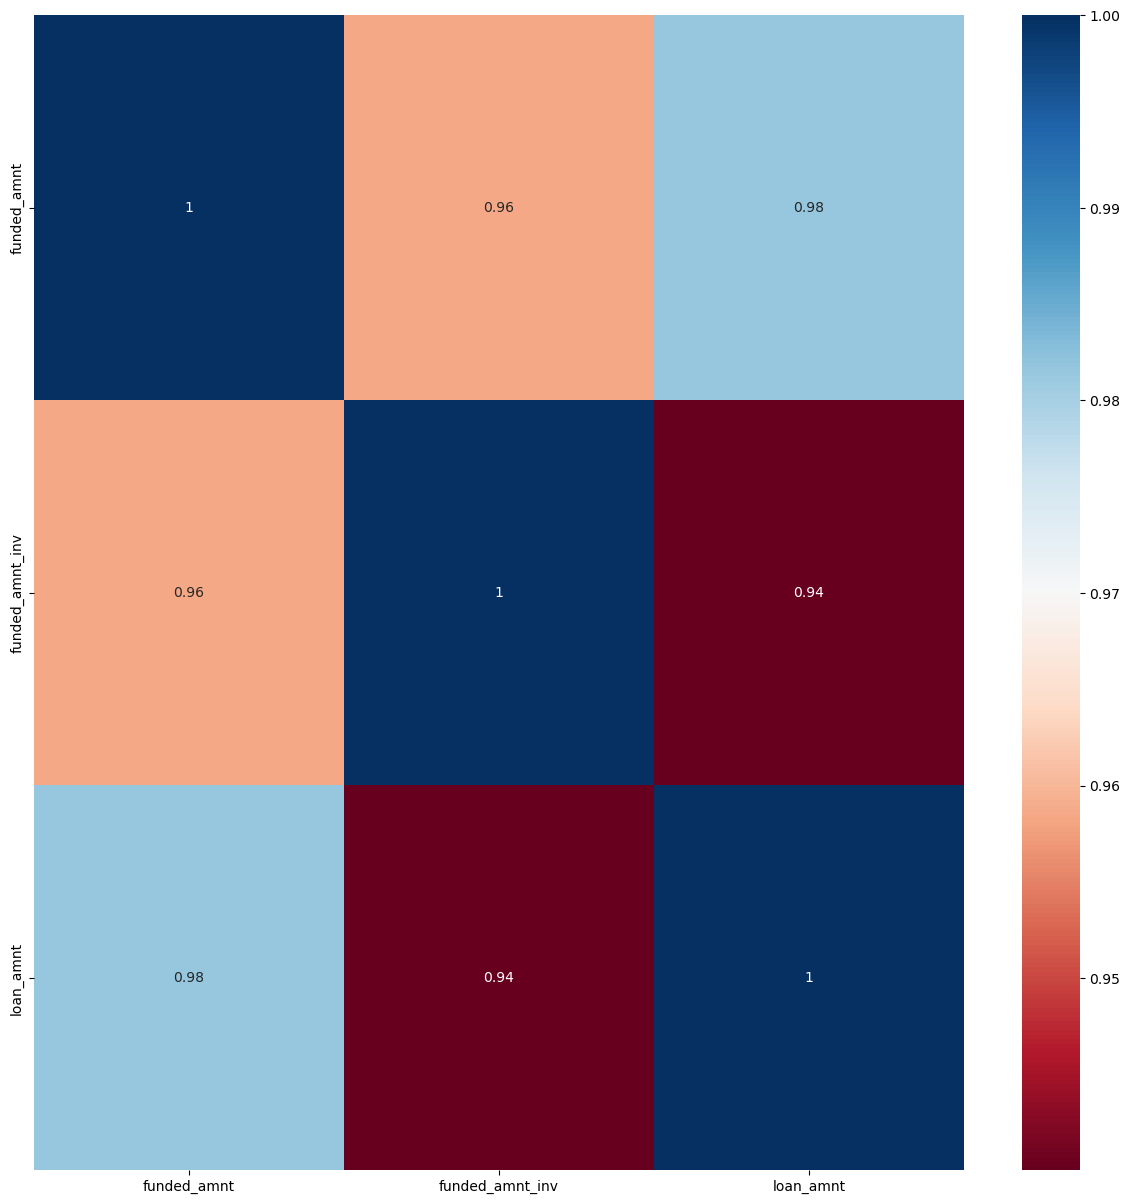

In [208]:
data = loan_df.loc[:, [ 'funded_amnt', 'funded_amnt_inv', 'loan_amnt']].corr()
#plt.figure(figsize = (3,3))
# sea.heatmap(corr, annot = True, cmap='Blues')
df = data.corr()
dim = 15
plt.figure(figsize=(dim, dim))
sns.heatmap(data, cmap="RdBu", annot=True)
plt.show()


C:\Users\sajana\AppData\Local\Temp\ipykernel_22156\2394341365.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_df[['loan_amnt','dti','annual_inc','int_rate','term','pub_rec_bankruptcies']].corr(),annot=True)


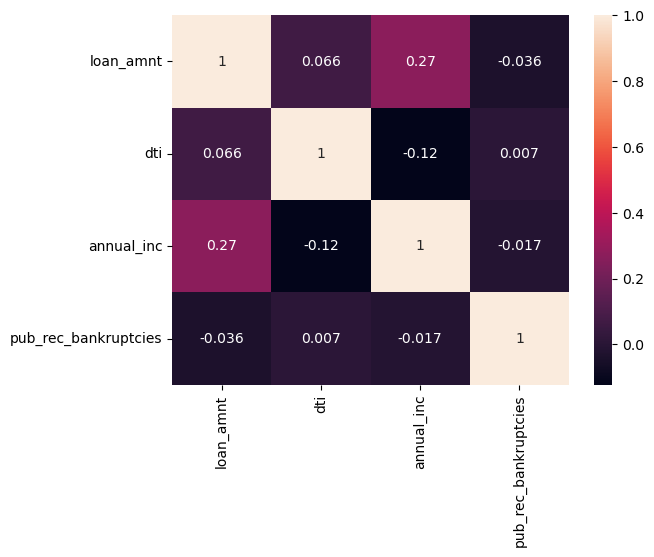

In [209]:
sns.heatmap(loan_df[['loan_amnt','dti','annual_inc','int_rate','term','pub_rec_bankruptcies']].corr(),annot=True)
plt.show()

## Insights

- The average loan amount is relatively high in defaulters than the fully paid.
- The interest rate is relatively high for defaulters than the fully paid.
- The number of installment is relatively high for loan defaulters than the fully paid.
- Mortgage, Own, Rent are the best in repaying the loan and in that order.
- The annual income of customers who have fully paid the loan is higher than the defaulters.
- dti is slightly higher in defaulters than the fully paid.
- total_rec_int is significantly higher in defaulters than in fully paid.
- total_rec_late_fee is significantly higher in defaulters than in fully paid.
- collection_recovery_fee is higher in defaulters than fully paid.
- employment length is also a strong indicator, 10+ years employees are defaulting about a percent more than the rest of the categories.
- Grade and sub grade also a strong indicator for identifying the risks.